### Step 1: Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder


# Machine Learning models/algorithms
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

### Step 2: Preprocess the data
- make the image grayscale
- crop the image
- convert the image into a 1 dimensional `numpy` array
- label the data so we can identify individual images within the array

In [2]:
def preprocess_image(file_path: str):
    """Returns a 1-dimensional numpy array that represents a cropped grayscale image\n
    Given a file path, this function turns the provided image file grayscale,\n
    crops it to 800x800 pixels in the center, and finally converts it into a 1-dimensional array
    """
    # Combine all above image preprocessing techniques into this one function
    # convert the image into a 3d numpy array
    img = cv2.imread(file_path)
    # make the image grayscale, reducing it to a 2d numpy array
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # select only a portion of the numpy array to represent an 800 x 800 pixels cropped image
    # we can find center of image by halving the image dimensions
    # calculate crop boundaries (400 pixels in each direction from center)
    center_y = gray_img.shape[0] // 2
    center_x = gray_img.shape[1] // 2
    start_y = center_y - 400
    start_x = center_x - 400
    end_y = center_y + 400
    end_x = center_x + 400
    crop = gray_img[start_y:end_y, start_x:end_x]

    # flatten 2d array into 1d
    return crop.ravel()

In [3]:
def format_and_crop_img(file_path: str):
    """Returns a 1-dimensional numpy array\n
    Given a file path, this function crops the provided image file to 800x800 pixels
    in the center, \n
    and finally converts it into a 1-dimensional array.
    This method preserves the color of the image.
    """
    # Combine all above image preprocessing techniques into this one function
    # convert the image into a 3d numpy array
    img = cv2.imread(file_path)
    
    # select only a portion of the numpy array to represent an 800 x 800 pixels cropped image
    # we can find center of image by halving the image dimensions
    # calculate crop boundaries (400 pixels in each direction from center)
    center_y = img.shape[0] // 2
    center_x = img.shape[1] // 2
    start_y = center_y - 400
    start_x = center_x - 400
    end_y = center_y + 400
    end_x = center_x + 400
    crop = img[start_y:end_y, start_x:end_x]

    # flatten 2d array into 1d
    return crop.ravel()

In [4]:
X = [] # features
y = [] # labels
data_input_size = 100

# preprocess images from each disease category
# then add the preprocessed images to the dataset while labelling them
for category in ['healthy', 'cocci', 'ncd', 'salmo']:
    for file_name in os.listdir(f"poultry_diseases/{category}/")[:data_input_size]:
        X.append( preprocess_image(f"poultry_diseases/{category}/{file_name}") )
        y.append(category) # label corresponding data

# convert to numpy arrays
X = np.array(X)
y = LabelEncoder().fit_transform(np.array(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 3: Model Selection
- Train model on preprocessed grayscale images
- Run at least 3 machine learning algorithms on the dataset
- Run `sklearn.classification_report()` to evaluate model accuracy, precision, recall, f1-score, and support

**Linear SVC Model**

In [5]:
svc_model_linear = SVC(kernel='linear', C=1.0, random_state=42)
svc_model_linear.fit(X_train, y_train)
y_pred = svc_model_linear.predict(X_test)

print(f"Linear SVC c=1")
print(f"{data_input_size} images trained")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Linear SVC c=1
100 images trained
Accuracy: 0.5125
              precision    recall  f1-score   support

           0       0.48      0.67      0.56        18
           1       0.54      0.58      0.56        26
           2       0.36      0.28      0.31        18
           3       0.69      0.50      0.58        18

    accuracy                           0.51        80
   macro avg       0.52      0.51      0.50        80
weighted avg       0.52      0.51      0.51        80



**SVC Model with rbf kernel**

In [6]:
svc_model = SVC(kernel='rbf', random_state=42)
svc_model.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)

print(f"SVC rbf kernel")
print(f"{data_input_size} images trained")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

SVC rbf kernel
100 images trained
Accuracy: 0.6375
              precision    recall  f1-score   support

           0       0.68      0.72      0.70        18
           1       0.67      0.62      0.64        26
           2       0.53      0.56      0.54        18
           3       0.67      0.67      0.67        18

    accuracy                           0.64        80
   macro avg       0.64      0.64      0.64        80
weighted avg       0.64      0.64      0.64        80



**DecisionTreeClassifier Model**

In [7]:
dct_model = DecisionTreeClassifier(max_depth=2, random_state=42)
dct_model.fit(X_train, y_train)
y_pred = dct_model.predict(X_test)
print(f"DecisionTreeClassifier max_depth=2")
print(f"{data_input_size} images trained")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

DecisionTreeClassifier max_depth=2
100 images trained
Accuracy: 0.4125
              precision    recall  f1-score   support

           0       0.55      0.61      0.58        18
           1       0.00      0.00      0.00        26
           2       0.31      0.72      0.43        18
           3       0.50      0.50      0.50        18

    accuracy                           0.41        80
   macro avg       0.34      0.46      0.38        80
weighted avg       0.31      0.41      0.34        80



**RandomForestClassifier**
- We found this model below to be the best performing model

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print(rf_model.get_params)
print(f"{data_input_size} images trained")
print(classification_report(y_test, y_pred))

RandomForest n_estimators=100
100 images trained
Accuracy: 0.6625
              precision    recall  f1-score   support

           0       0.74      0.78      0.76        18
           1       0.74      0.54      0.62        26
           2       0.53      0.56      0.54        18
           3       0.65      0.83      0.73        18

    accuracy                           0.66        80
   macro avg       0.66      0.68      0.66        80
weighted avg       0.67      0.66      0.66        80



### Step 4: Train model on colored images
- Train chosen model on colored image data for higher accuracy

In [9]:
X = [] # features
y = [] # labels
data_input_size = 300

# preprocess images from each disease category
# then add the preprocessed images to the dataset while labelling them
for category in ['healthy', 'cocci', 'ncd', 'salmo']:
    for file_name in os.listdir(f"poultry_diseases/{category}/")[:data_input_size]:
        X.append( format_and_crop_img(f"poultry_diseases/{category}/{file_name}") )
        y.append(category) # label corresponding data

# convert to numpy arrays
X = np.array(X)
# encode labels
le = LabelEncoder()
y = le.fit_transform(np.array(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy increases to 72% when we:
- increase training data to 300 images
- use color images instead of grayscale

In [10]:
# after experimentation, highest accuracy is
# 190-193 estimators
# 500 gives highest at 70%
rf_model = RandomForestClassifier(n_estimators=500, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(f"RandomForest n_estimators=500")
print(f"{data_input_size} images trained")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

RandomForest n_estimators=500
300 images trained
Accuracy: 0.7208333333333333
              precision    recall  f1-score   support

           0       0.88      0.82      0.84        60
           1       0.74      0.77      0.76        62
           2       0.54      0.58      0.56        60
           3       0.76      0.71      0.73        58

    accuracy                           0.72       240
   macro avg       0.73      0.72      0.72       240
weighted avg       0.73      0.72      0.72       240



### Step 5: Check for overfitting
- See where max_depth gets too specialized to training data that it overfits
- Test scores don't change much after max_depth=4
- Gap between train score and test score is more pronounced as max_depth increases
- The most optimal place is at max_depth=4 where it learns general pattern rather than overfitting

In [11]:
param_grid = {'max_depth':range(1,7)}

my_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid = param_grid,
    cv=5,
    return_train_score=True
)

my_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': range(1, 7)}, return_train_score=True)

In [12]:
result = pd.DataFrame(my_grid.cv_results_)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,18.492357,9.830209,1.261842,0.394911,1,{'max_depth': 1},0.427083,0.484375,0.447917,0.432292,0.468750,0.452083,0.021701,6,0.486979,0.498698,0.477865,0.475260,0.483073,0.484375,0.008235
1,20.945007,2.654902,1.086269,0.114984,2,{'max_depth': 2},0.515625,0.609375,0.572917,0.593750,0.625000,0.583333,0.037989,5,0.680990,0.674479,0.638021,0.648438,0.677083,0.663802,0.017243
2,29.916649,2.694775,1.312617,0.351715,3,{'max_depth': 3},0.531250,0.645833,0.619792,0.609375,0.661458,0.613542,0.045093,4,0.755208,0.735677,0.740885,0.742188,0.748698,0.744531,0.006761
3,39.379505,4.930041,1.383174,0.443231,4,{'max_depth': 4},0.604167,0.666667,0.651042,0.656250,0.651042,0.645833,0.021600,3,0.828125,0.817708,0.822917,0.819010,0.824219,0.822396,0.003738
4,53.326986,8.129839,1.541829,0.362428,5,{'max_depth': 5},0.614583,0.677083,0.651042,0.640625,0.682292,0.653125,0.024782,2,0.890625,0.911458,0.908854,0.898438,0.907552,0.903385,0.007743
5,62.598240,9.071835,1.966234,0.679962,6,{'max_depth': 6},0.651042,0.682292,0.661458,0.635417,0.661458,0.658333,0.015309,1,0.945312,0.953125,0.962240,0.949219,0.947917,0.951562,0.005904


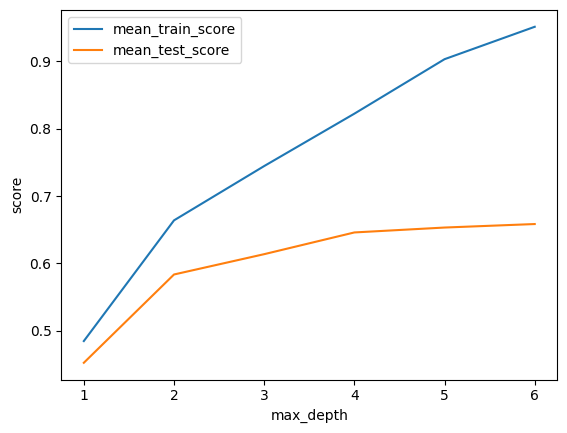

In [13]:
plt.figure()
plt.plot(result['param_max_depth'], result['mean_train_score'], label ='mean_train_score')
plt.plot(result['param_max_depth'], result['mean_test_score'], label ='mean_test_score')
plt.xlabel('max_depth')
plt.ylabel('score')
plt.legend()
plt.show()